# Getting Started [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxencefaldor/bbobax/blob/main/notebooks/getting_started.ipynb)

In this notebook, we will cover how to:
- Instantiate a BBO function.
- Sample BBO parameters.
- Initialize BBO state.
- Sample a solution from the search space
- Evaluate a solution to get its fitness
- Plot the BBO function.

## Install

You will need Python 3.11 or later, and a working JAX installation. For example, you can install JAX with:

In [ ]:
%pip install -U "jax[cuda]"

Then, install CAX from PyPi:

In [ ]:
%pip install -U "bbobax[notebooks]"

# Import

In [1]:
import jax
import jax.numpy as jnp

from bbobax import BBOB

In [2]:
seed = 0

key = jax.random.key(seed)

## Sphere

### Instantiate BBOB

In [3]:
from bbobax.fitness_fns import sphere

bbob = BBOB(
    fitness_fns=[sphere],
    min_num_dims=2,
    max_num_dims=2,
    x_range=[-5, 5],
    x_opt_range=[0, 0],
    f_opt_range=[0, 0],
    clip_x=False,
    sample_rotation=False,
    noise_config={"noise_model_names": ["noiseless"]},
)

### Sample BBOB parameters

In [4]:
key, subkey = jax.random.split(key)
params = bbob.sample(subkey)
params

BBOBParams(fn_id=Array(0, dtype=int32), num_dims=Array(2, dtype=int32), x_opt=Array([0., 0.], dtype=float32), f_opt=Array(0., dtype=float32), noise_params=NoiseParams(noise_id=Array(0, dtype=int32), gaussian_beta=Array(0.36132753, dtype=float32), uniform_alpha=Array(0.44864777, dtype=float32), uniform_beta=Array(0.22577344, dtype=float32), cauchy_alpha=Array(0.1728976, dtype=float32), cauchy_p=Array(0.18512261, dtype=float32), additive_std=Array(0.04558092, dtype=float32)))

### Initialize BBOB state

In [5]:
key, subkey = jax.random.split(key)
state = bbob.init(subkey, params)
state

BBOBState(r=Array([[1., 0.],
       [0., 1.]], dtype=float32), q=Array([[1., 0.],
       [0., 1.]], dtype=float32), counter=0)

### Sample solution

In [6]:
key, subkey = jax.random.split(key)
x = bbob.sample_x(subkey)

### Evaluate

In [7]:
key, subkey = jax.random.split(key)
state, eval = bbob.evaluate(subkey, x, state, params)
print(f"Fitness: {eval.fitness}")

Fitness: 25.306095123291016


### Plot

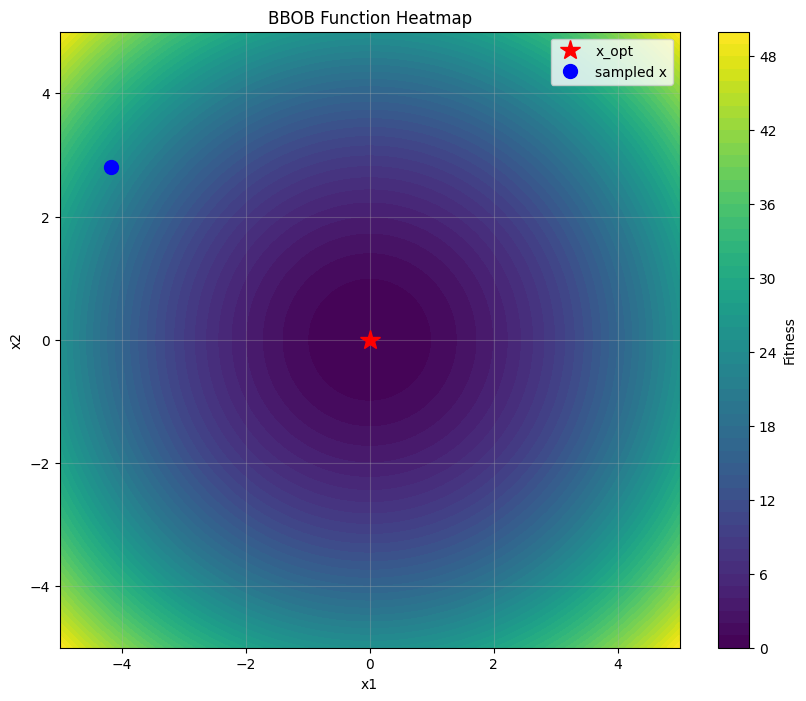

In [8]:
import matplotlib.pyplot as plt

# Create a grid for plotting
x_range = jnp.linspace(-5, 5, 100)
y_range = jnp.linspace(-5, 5, 100)
X, Y = jnp.meshgrid(x_range, y_range)

# Evaluate the function on the grid
grid_points = jnp.stack([X.flatten(), Y.flatten()], axis=1)

# Use vmap to vectorize the evaluation
vmapped_evaluate = jax.vmap(
    lambda point: bbob.evaluate(subkey, point, state, params)[1].fitness
)
grid_fitness = vmapped_evaluate(grid_points).reshape(X.shape)

# Create the plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, grid_fitness, levels=50, cmap="viridis")
plt.colorbar(label="Fitness")

# Plot the optimal point
plt.plot(params.x_opt[0], params.x_opt[1], "r*", markersize=15, label="x_opt")

# Plot the sampled point
plt.plot(x[0], x[1], "bo", markersize=10, label="sampled x")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("BBOB Function Heatmap")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Rosenbrock

### Instantiate BBOB

In [9]:
from bbobax.fitness_fns import rosenbrock

bbob = BBOB(
    fitness_fns=[rosenbrock],
    min_num_dims=2,
    max_num_dims=2,
    x_range=[-5, 5],
    x_opt_range=[0, 0],
    f_opt_range=[0, 0],
    clip_x=False,
    sample_rotation=False,
    noise_config={"noise_model_names": ["noiseless"]},
)

### Sample BBOB parameters

In [10]:
key, subkey = jax.random.split(key)
params = bbob.sample(subkey)
params

BBOBParams(fn_id=Array(0, dtype=int32), num_dims=Array(2, dtype=int32), x_opt=Array([0., 0.], dtype=float32), f_opt=Array(0., dtype=float32), noise_params=NoiseParams(noise_id=Array(0, dtype=int32), gaussian_beta=Array(0.70297843, dtype=float32), uniform_alpha=Array(0.23709728, dtype=float32), uniform_beta=Array(0.4198368, dtype=float32), cauchy_alpha=Array(0.8532587, dtype=float32), cauchy_p=Array(0.15531364, dtype=float32), additive_std=Array(0.06283038, dtype=float32)))

### Initialize BBOB state

In [11]:
key, subkey = jax.random.split(key)
state = bbob.init(subkey, params)
state

BBOBState(r=Array([[1., 0.],
       [0., 1.]], dtype=float32), q=Array([[1., 0.],
       [0., 1.]], dtype=float32), counter=0)

### Sample solution

In [12]:
key, subkey = jax.random.split(key)
x = bbob.sample_x(subkey)

### Evaluate

In [13]:
key, subkey = jax.random.split(key)
state, eval = bbob.evaluate(subkey, x, state, params)
print(f"Fitness: {eval.fitness}")

Fitness: 764.84423828125


### Plot

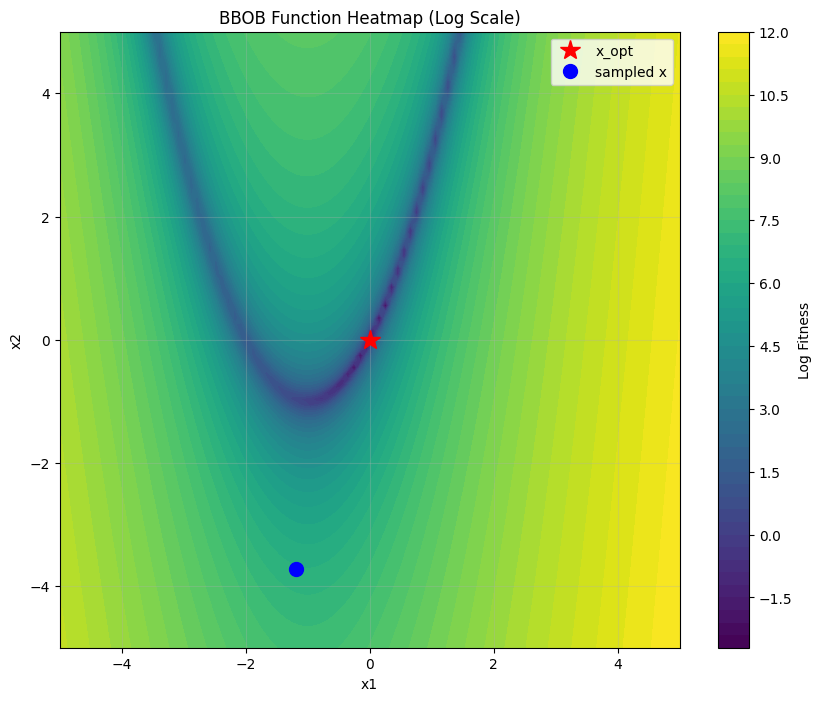

In [14]:
import matplotlib.pyplot as plt

# Create a grid for plotting
x_range = jnp.linspace(-5, 5, 100)
y_range = jnp.linspace(-5, 5, 100)
X, Y = jnp.meshgrid(x_range, y_range)

# Evaluate the function on the grid
grid_points = jnp.stack([X.flatten(), Y.flatten()], axis=1)

# Use vmap to vectorize the evaluation
vmapped_evaluate = jax.vmap(
    lambda point: bbob.evaluate(subkey, point, state, params)[1].fitness
)
grid_fitness = vmapped_evaluate(grid_points).reshape(X.shape)

# Apply log transformation for better visualization
# Add a small constant to avoid log(0) issues
log_fitness = jnp.log(grid_fitness + 1e-8)

# Create the plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, log_fitness, levels=50, cmap="viridis")
plt.colorbar(label="Log Fitness")

# Plot the optimal point
plt.plot(params.x_opt[0], params.x_opt[1], "r*", markersize=15, label="x_opt")

# Plot the sampled point
plt.plot(x[0], x[1], "bo", markersize=10, label="sampled x")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("BBOB Function Heatmap (Log Scale)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Rosenbrock with randomness

### Instantiate BBOB

In [15]:
from bbobax.fitness_fns import rosenbrock_rotated

bbob = BBOB(
    fitness_fns=[rosenbrock_rotated],
    min_num_dims=2,
    max_num_dims=2,
    x_range=[-5, 5],
    x_opt_range=[-4, 4],  # x_opt is sampled randomly
    f_opt_range=[0, 100],  # f_opt is sampled randomly
    sample_rotation=True,  # sample rotation matrix
    noise_config={"noise_model_names": ["noiseless"]},
)

### Sample BBOB parameters

In [16]:
key, subkey = jax.random.split(key)
params = bbob.sample(subkey)
params

BBOBParams(fn_id=Array(0, dtype=int32), num_dims=Array(2, dtype=int32), x_opt=Array([-3.1669483,  0.2918682], dtype=float32), f_opt=Array(2.1997094, dtype=float32), noise_params=NoiseParams(noise_id=Array(0, dtype=int32), gaussian_beta=Array(0.9812749, dtype=float32), uniform_alpha=Array(0.2676749, dtype=float32), uniform_beta=Array(0.1289506, dtype=float32), cauchy_alpha=Array(0.82406837, dtype=float32), cauchy_p=Array(0.19496787, dtype=float32), additive_std=Array(0.04585386, dtype=float32)))

### Initialize BBOB state

In [17]:
key, subkey = jax.random.split(key)
state = bbob.init(subkey, params)
state

BBOBState(r=Array([[-0.93561584,  0.3530194 ],
       [-0.35301942, -0.935616  ]], dtype=float32), q=Array([[ 0.7502459 , -0.66115886],
       [ 0.66115886,  0.7502459 ]], dtype=float32), counter=0)

### Sample solution

In [18]:
key, subkey = jax.random.split(key)
x = bbob.sample_x(subkey)

### Evaluate

In [19]:
key, subkey = jax.random.split(key)
state, eval = bbob.evaluate(subkey, x, state, params)
print(f"Fitness: {eval.fitness}")

Fitness: 717.5936279296875


### Plot

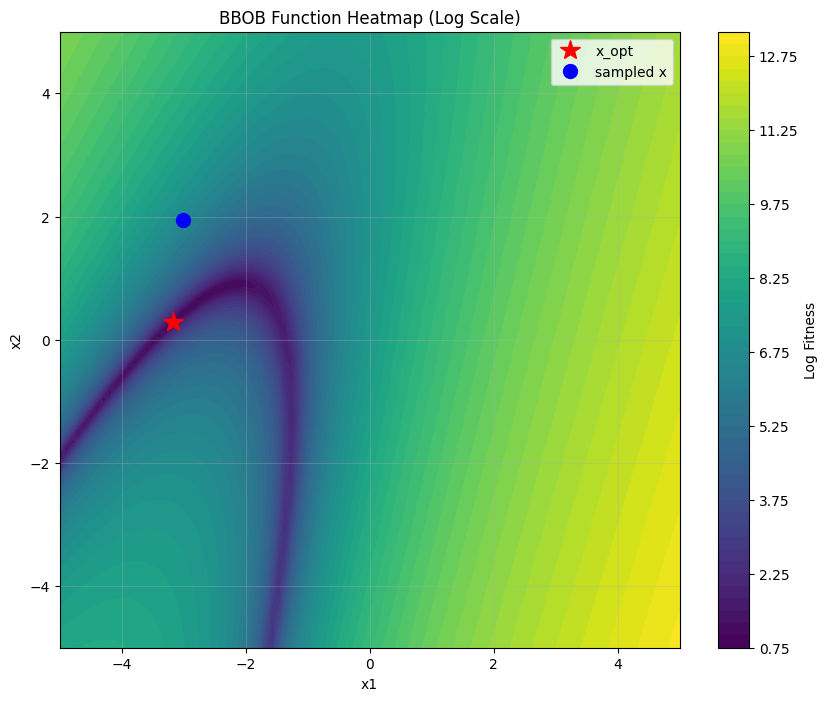

In [20]:
import matplotlib.pyplot as plt

# Create a grid for plotting
x_range = jnp.linspace(-5, 5, 100)
y_range = jnp.linspace(-5, 5, 100)
X, Y = jnp.meshgrid(x_range, y_range)

# Evaluate the function on the grid
grid_points = jnp.stack([X.flatten(), Y.flatten()], axis=1)

# Use vmap to vectorize the evaluation
vmapped_evaluate = jax.vmap(
    lambda point: bbob.evaluate(subkey, point, state, params)[1].fitness
)
grid_fitness = vmapped_evaluate(grid_points).reshape(X.shape)

# Apply log transformation for better visualization
# Add a small constant to avoid log(0) issues
log_fitness = jnp.log(grid_fitness + 1e-8)

# Create the plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, log_fitness, levels=50, cmap="viridis")
plt.colorbar(label="Log Fitness")

# Plot the optimal point
plt.plot(params.x_opt[0], params.x_opt[1], "r*", markersize=15, label="x_opt")

# Plot the sampled point
plt.plot(x[0], x[1], "bo", markersize=10, label="sampled x")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("BBOB Function Heatmap (Log Scale)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()